**Transfer Learning**


* Keras contains pretrained models for image classification which are trained on Imagenet data. 
* Imagenet is a large collection of image data containing 1000 categories of images. 
* These pretrained models are capable of classifying any image that falls into these 1000 categories of images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive/CNN-Model/'

animalModel.h5	animals


In [ ]:
dataset_path = '/content/drive/My Drive/CNN-Model/animals/'

In [ ]:
seed_value = 0

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import cv2

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

**Load the Data**

In [ ]:
# lists to hold data

images = []
labels = []

In [ ]:
# listing all folder names in the specified path
folders = os.listdir(dataset_path)
folders

['bee',
 'butterfly',
 'boar',
 'cat',
 'bear',
 'bison',
 'badger',
 'antelope',
 'beetle',
 'bat',
 'cockroach',
 'dog',
 'coyote',
 'cow',
 'crab',
 'deer',
 'dolphin',
 'crow',
 'chimpanzee',
 'caterpillar',
 'duck',
 'elephant',
 'flamingo',
 'eagle',
 'dragonfly',
 'fly',
 'goldfish',
 'fox',
 'donkey',
 'goat',
 'horse',
 'grasshopper',
 'hippopotamus',
 'gorilla',
 'hamster',
 'hare',
 'goose',
 'hornbill',
 'hummingbird',
 'hedgehog',
 'jellyfish',
 'lion',
 'hyena',
 'koala',
 'lizard',
 'kangaroo',
 'mosquito',
 'leopard',
 'lobster',
 'ladybugs',
 'okapi',
 'mouse',
 'otter',
 'moth',
 'oyster',
 'octopus',
 'owl',
 'ox',
 'panda',
 'orangutan',
 'raccoon',
 'penguin',
 'porcupine',
 'rat',
 'parrot',
 'reindeer',
 'pig',
 'pelecaniformes',
 'possum',
 'pigeon',
 'seahorse',
 'squid',
 'rhinoceros',
 'shark',
 'sandpiper',
 'seal',
 'sheep',
 'sparrow',
 'snake',
 'squirrel',
 'tiger',
 'turtle',
 'turkey',
 'starfish',
 'wolf',
 'swan',
 'whale',
 'wombat',
 'woodpecker',


In [ ]:
# Creating dictionaries to map folder names
count = 0
name_mapping_dict = dict()

for folder_name in folders:
  name_mapping_dict[folder_name] = count
  count += 1


name_mapping_dict

{'antelope': 7,
 'badger': 6,
 'bat': 9,
 'bear': 4,
 'bee': 0,
 'beetle': 8,
 'bison': 5,
 'boar': 2,
 'butterfly': 1,
 'cat': 3,
 'caterpillar': 19,
 'chimpanzee': 18,
 'cockroach': 10,
 'cow': 13,
 'coyote': 12,
 'crab': 14,
 'crow': 17,
 'deer': 15,
 'dog': 11,
 'dolphin': 16,
 'donkey': 28,
 'dragonfly': 24,
 'duck': 20,
 'eagle': 23,
 'elephant': 21,
 'flamingo': 22,
 'fly': 25,
 'fox': 27,
 'goat': 29,
 'goldfish': 26,
 'goose': 36,
 'gorilla': 33,
 'grasshopper': 31,
 'hamster': 34,
 'hare': 35,
 'hedgehog': 39,
 'hippopotamus': 32,
 'hornbill': 37,
 'horse': 30,
 'hummingbird': 38,
 'hyena': 42,
 'jellyfish': 40,
 'kangaroo': 45,
 'koala': 43,
 'ladybugs': 49,
 'leopard': 47,
 'lion': 41,
 'lizard': 44,
 'lobster': 48,
 'mosquito': 46,
 'moth': 53,
 'mouse': 51,
 'octopus': 55,
 'okapi': 50,
 'orangutan': 59,
 'otter': 52,
 'owl': 56,
 'ox': 57,
 'oyster': 54,
 'panda': 58,
 'parrot': 64,
 'pelecaniformes': 67,
 'penguin': 61,
 'pig': 66,
 'pigeon': 69,
 'porcupine': 62,
 'pos

In [ ]:
inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'bee', 1: 'butterfly', 2: 'boar', 3: 'cat', 4: 'bear', 5: 'bison', 6: 'badger', 7: 'antelope', 8: 'beetle', 9: 'bat', 10: 'cockroach', 11: 'dog', 12: 'coyote', 13: 'cow', 14: 'crab', 15: 'deer', 16: 'dolphin', 17: 'crow', 18: 'chimpanzee', 19: 'caterpillar', 20: 'duck', 21: 'elephant', 22: 'flamingo', 23: 'eagle', 24: 'dragonfly', 25: 'fly', 26: 'goldfish', 27: 'fox', 28: 'donkey', 29: 'goat', 30: 'horse', 31: 'grasshopper', 32: 'hippopotamus', 33: 'gorilla', 34: 'hamster', 35: 'hare', 36: 'goose', 37: 'hornbill', 38: 'hummingbird', 39: 'hedgehog', 40: 'jellyfish', 41: 'lion', 42: 'hyena', 43: 'koala', 44: 'lizard', 45: 'kangaroo', 46: 'mosquito', 47: 'leopard', 48: 'lobster', 49: 'ladybugs', 50: 'okapi', 51: 'mouse', 52: 'otter', 53: 'moth', 54: 'oyster', 55: 'octopus', 56: 'owl', 57: 'ox', 58: 'panda', 59: 'orangutan', 60: 'raccoon', 61: 'penguin', 62: 'porcupine', 63: 'rat', 64: 'parrot', 65: 'reindeer', 66: 'pig', 67: 'pelecaniformes', 68: 'possum', 69: 'pigeon', 70: 'seahorse'

In [ ]:
# Setting image size
img_size = 128

**Pre-process dataset**

In [ ]:
# looping through each folder and getting images and creating labels
for folder in folders:
  print(f'Processing folder: {folder}')
  filenames = os.listdir(dataset_path+folder+'/')

  for fname in filenames:
    img = plt.imread(dataset_path+folder+'/'+fname)
    img = cv2.resize(img, (img_size, img_size))
    images.append(img)
    labels.append(name_mapping_dict[folder])

Processing folder: bee
Processing folder: butterfly
Processing folder: boar
Processing folder: cat
Processing folder: bear
Processing folder: bison
Processing folder: badger
Processing folder: antelope
Processing folder: beetle
Processing folder: bat
Processing folder: cockroach
Processing folder: dog
Processing folder: coyote
Processing folder: cow
Processing folder: crab
Processing folder: deer
Processing folder: dolphin
Processing folder: crow
Processing folder: chimpanzee
Processing folder: caterpillar
Processing folder: duck
Processing folder: elephant
Processing folder: flamingo
Processing folder: eagle
Processing folder: dragonfly
Processing folder: fly
Processing folder: goldfish
Processing folder: fox
Processing folder: donkey
Processing folder: goat
Processing folder: horse
Processing folder: grasshopper
Processing folder: hippopotamus
Processing folder: gorilla
Processing folder: hamster
Processing folder: hare
Processing folder: goose
Processing folder: hornbill
Processing 

In [ ]:
# Converting lists to numpy arrays for easy matrix operations
images = np.array(images)
labels = np.array(labels)

In [ ]:
print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (5400, 128, 128, 3)
labels shape :  (5400,)


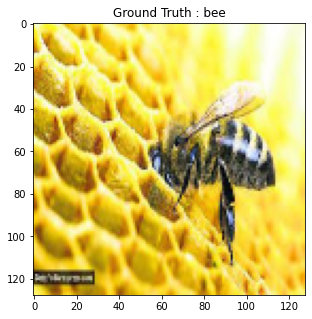

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 58
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

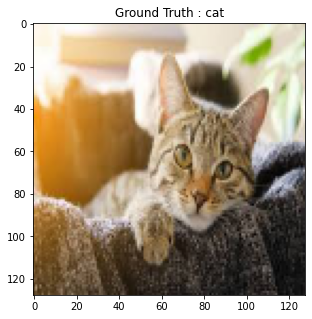

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 220
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

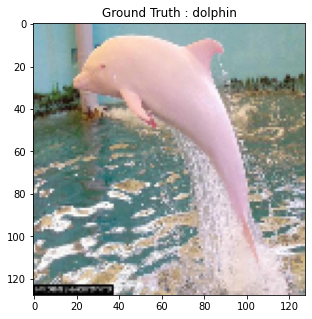

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 1009
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

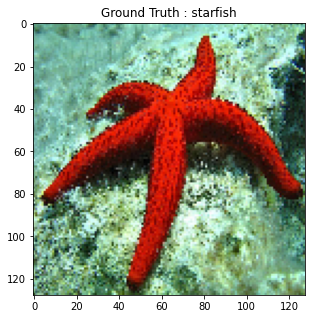

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 4990
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  90
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]


In [ ]:
# Normalize training image pixels
images = np.array(images) / 255

In [ ]:
# Change the labels from integer to categorical data
labels_one_hot = to_categorical(labels)

In [ ]:
labels[303]

5

In [ ]:
labels_one_hot[303]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.], dtype=float32)

**Shuffling and Splittng Dataset**

In [ ]:
# Shuffling and Splittng Dataset
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.20, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (4320, 128, 128, 3) (4320, 90)
Testing data shape :  (1080, 128, 128, 3) (1080, 90)


**Design the Network Architecure for Convolutional Neural Network**


* Getting a pretrained Feature Extractor
* Removing its Fully-Connected layers and attaching our own (To exclude the default classifier we have to set argument include_top to false)

Attaching our own classifier

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

"""
Pre-trained model examples are as follows:


pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False)
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=(img_size, img_size, 3))
pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
"""

# pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False)
pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

pretrained_model.trainable = False

model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(classes_num, activation="softmax"))

17235968/17225924 [==============================] - 0s 0us/step




**Configure the model training time parameters**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Train the Model**

In [ ]:
history = model.fit(train_images, train_labels, batch_size=64,  epochs=20, verbose=1, 
                   validation_data=(test_images, test_labels))

Epoch 1/20
68/68 [==============================] - 59s 868ms/step - loss: 0.0211 - accuracy: 0.9958 - val_loss: 1.9225 - val_accuracy: 0.7889
Epoch 2/20
68/68 [==============================] - 61s 906ms/step - loss: 0.0173 - accuracy: 0.9979 - val_loss: 1.8561 - val_accuracy: 0.7944
Epoch 3/20
68/68 [==============================] - 58s 862ms/step - loss: 0.0144 - accuracy: 0.9988 - val_loss: 1.9132 - val_accuracy: 0.7769
Epoch 4/20
68/68 [==============================] - 59s 865ms/step - loss: 0.0374 - accuracy: 0.9981 - val_loss: 1.8909 - val_accuracy: 0.7778
Epoch 5/20
68/68 [==============================] - 58s 861ms/step - loss: 0.0612 - accuracy: 0.9891 - val_loss: 2.7879 - val_accuracy: 0.7278
Epoch 6/20
68/68 [==============================] - 60s 889ms/step - loss: 0.3403 - accuracy: 0.9579 - val_loss: 4.7162 - val_accuracy: 0.6722
Epoch 7/20
68/68 [==============================] - 58s 862ms/step - loss: 0.7756 - accuracy: 0.9199 - val_loss: 6.0354 - val_accuracy: 0.6417

**Evaluate the Trained Model on Testing Data**

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss, test_acc*100))

34/34 [==============================] - 12s 352ms/step - loss: 1.8901 - accuracy: 0.7963
Evaluation result on Test Data : Loss = 1.890087366104126, accuracy = 79.62962985038757%


In [ ]:
[train_loss, train_acc] = model.evaluate(train_images, train_labels)
print("Evaluation result on train Data : Loss = {}, accuracy = {}%".format(train_loss, train_acc*100))

135/135 [==============================] - 48s 355ms/step - loss: 0.0097 - accuracy: 0.9991
Evaluation result on train Data : Loss = 0.009651209227740765, accuracy = 99.90741014480591%


**Save Trained Model**

In [ ]:
model_path = '/content/drive/My Drive/CNN-Model/'

model.save(model_path+'MobileNet_animals_model.h5')

**Display Loss and Accuracy Plots**

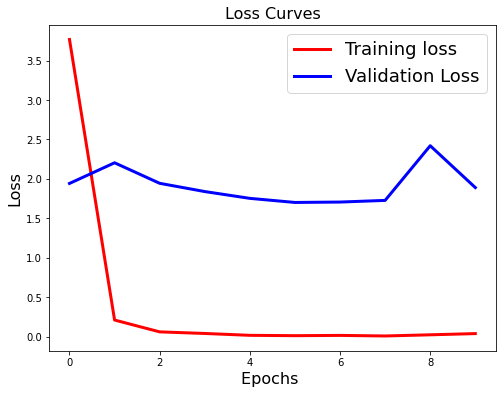

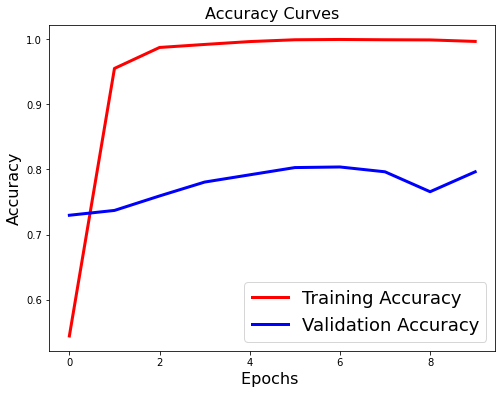

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

**Test the Trained Model on Testing Data: <br/>Testing a single image**

In [ ]:
def test_single_image(test_img_number):

  # make prediction
  prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
  print("Model prediction: {}".format(prediction))

  # Display the predicted image
  plt.imshow(test_images[test_img_number])
  plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
  plt.xticks([])
  plt.yticks([])
  plt.show()


Model prediction: hummingbird


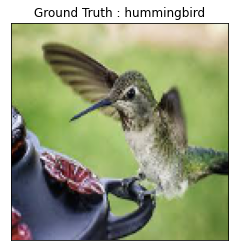

In [ ]:
test_single_image(test_img_number=0)

Model prediction: fox


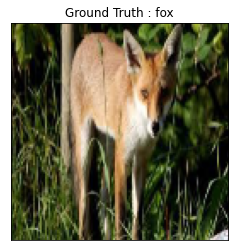

In [ ]:
test_single_image(test_img_number=1)

Model prediction: boar


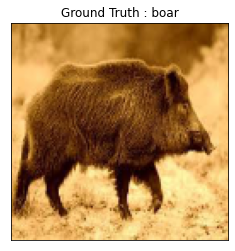

In [ ]:
test_single_image(test_img_number=3)

Model prediction: panda


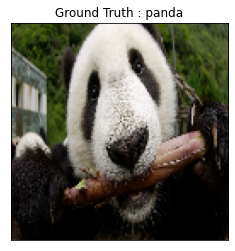

In [ ]:
test_single_image(test_img_number=4)

Model prediction: sheep


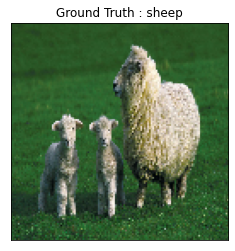

In [ ]:
test_single_image(test_img_number=5)

Model prediction: squid


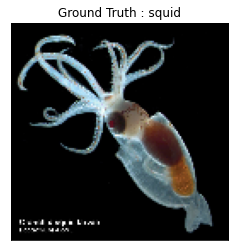

In [ ]:
test_single_image(test_img_number=6)

Model prediction: caterpillar


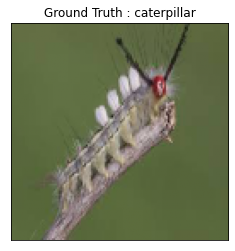

In [ ]:
test_single_image(test_img_number=7)

Model prediction: orangutan


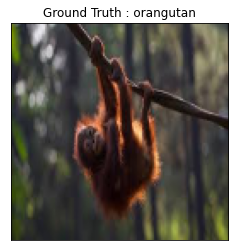

In [ ]:
test_single_image(test_img_number=10)

Model prediction: octopus


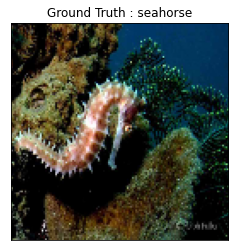

In [ ]:
test_single_image(test_img_number=201)